In [6]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

iris = datasets.load_iris()
x,y = iris.data, iris.target
print(x)
print(y)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 10)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

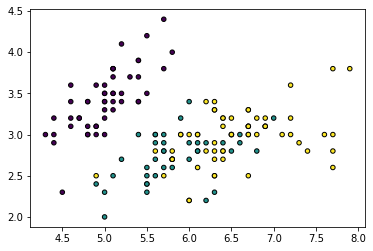

In [17]:
plt.figure()
plt.scatter(x[:,0],x[:,1],c=y,edgecolor='k',s=20)
plt.show()

In [18]:
def euclidean(x1,x2):
    return(np.sqrt(np.sum(x1 - x2)**2))

In [20]:
from collections import Counter

In [22]:
class knn:
    def __init__(self,k=3):
        self.k = k
    
    
    def fit(self,x,y):
        self.x_train = x
        self.y_train = y
        
        
    def predict(self,X):
        predicted_labels = [self._predict(x) for x in X]
        return np.array(predicted_labels)
    
    
    def _predict(self,X):
        #compute deistances
        distances = [euclidean(X,x_train) for x_train in self.x_train]
        #get k nearest samples and labels
        k_index = np.argsort(distances)[:self.k]
        k_labels = [self.y_train[i] for i in k_index]
        #majority voting
        most_common = Counter(k_labels).most_common(1)
        return most_common[0][0]
    

In [31]:
clf = knn(k=5)
clf.fit(x_train,y_train)
predictions = clf.predict(x_test)

acc = np.sum(predictions == y_test) / len(y_test)
print(acc)

0.9
